In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
def save_captured_output(file_path):   
    # Redirect the captured output to the text file
    with open(file_path, "w") as file:
        file.write(captured_output.stdout)

In [7]:
df_all = pd.read_json('../data/extracted/extracted_all.json')
#df_all = pd.read_json('./extracted_mini.json')

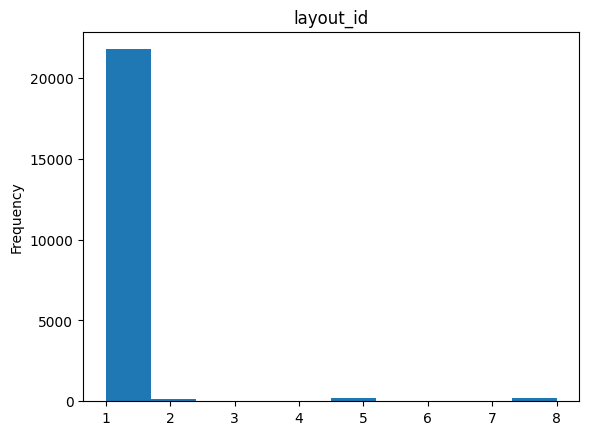

layout_id
1    21778
2      148
5      196
6        2
7       12
8      207


In [8]:
df_all['layout_id'].plot.hist()
plt.title('layout_id')
plt.savefig('histogram_layout_id.pdf', bbox_inches='tight')  # Change the filename and format as needed
plt.show()
print(df_all['layout_id'].value_counts().sort_index().to_string(index=True))

In [9]:
%%capture captured_output
print(df_all['layout_id'].value_counts().sort_index().to_string(index=True))

In [10]:
save_captured_output('histogram_layout_id.txt')

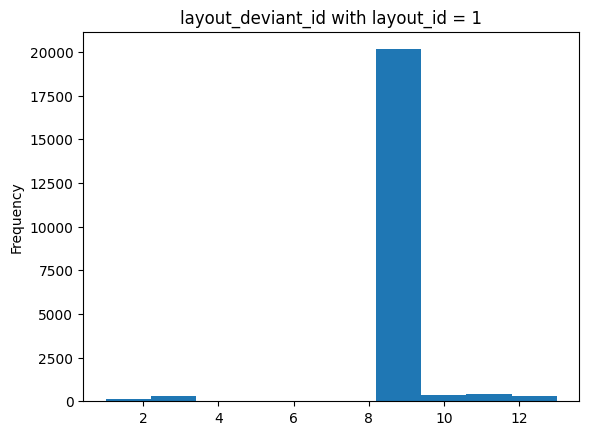

layout_deviant_id
1.0         8
2.0       138
3.0       299
6.0        35
7.0        17
9.0     20151
10.0      382
11.0      410
12.0      307
13.0       11


In [11]:
df_layout_1 = df_all[df_all['layout_id'] == 1]
df_layout_1['layout_deviant_id'].plot.hist()
plt.title('layout_deviant_id with layout_id = 1')
plt.savefig('histogram_layout_deviant_id.pdf', bbox_inches='tight') 
plt.show()
print(df_layout_1['layout_deviant_id'].value_counts().sort_index().to_string(index=True))

In [12]:
%%capture captured_output
print(df_layout_1['layout_deviant_id'].value_counts().sort_index().to_string(index=True))

In [13]:
save_captured_output('histogram_layout_deviant_id.txt')

In [14]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('../data/boardlib-kilter-db.sqlite3')  # Replace 'your_database_name.db' with your actual database filename

# Query to select all columns from a table (replace 'your_table_name' with the actual table name)
query = "SELECT * FROM climbs_cleaned"

# Load data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


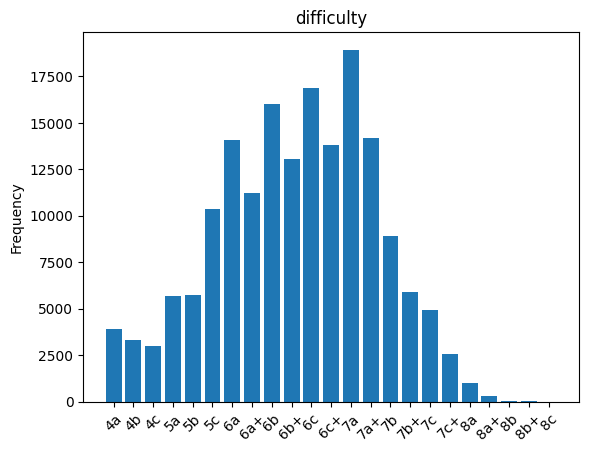

In [17]:
import matplotlib.pyplot as plt
text_counts = df['difficulty'].value_counts()
text_counts.index = text_counts.index.str.split('/').str[0]

text_counts = text_counts.sort_index()

# Plot the histogram

plt.bar(text_counts.index, text_counts.values)
plt.ylabel('Frequency')
plt.title('difficulty')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('histogram_difficulties.pdf', bbox_inches='tight')
plt.savefig('histogram_difficulties.png', bbox_inches='tight')
plt.show()


In [ ]:
del df